# **Car Accident Warning System :: Seattle City**
---

## Introduction / Business Understanding

Everyone who commutes daily to work would know that traveling can be a stressful and time wasting activity if not planned properly. Traveling time is one of the main factors that determine how pleasant your commute to and from work would be. One of the factors that needs to be taken into account is facing a Congestion/Traffic Jam because of an accident that took place on the route you take. The aim of this project is to see if we can build a model to be able to predict the severity of an accident taking place taking into account different environmental/traffic/geographical factors. This will be able to help both, law enforcing agencies as well as daily commuters.

* **Law enforcing agencies** stand to gain by being able to proactively avert such accidents if a certain set of conditions arrive and being able to take appropriate actions if and when it does, so that they can ensure minimum impact on traffic flow.

* **Commuters** stand to gain by being forewarned about the accidents and planning/rerouting their journey accordingly. They can also be more vigilant in certain conditions that are prone to accidents.

In the end, we all stand to gain collectively as a society as we will have less accidents, safer roads, less pollution (noise and air) due to less traffic jams and an over improvement in daily commute both in terms of time and stress.

## Data Analysis

To realize the solution to the problem at hand, we needed an appropriate data source that contains data on past incidents, the conditions they took place in and outcomes, related to traffic related accidents. We got a data source from the Government of Seattle Website (https://data.seattle.gov/Land-Base/Collisions/9kas-rb8d) that contains the latest dataset for us to analyze and build a model to be able to predict the desired results.

There are a total of **40 Variables** and **221267 Data points/Observations**. Looking at the data set, we see some columns that look useful, including 

* **LOCATION** - Description of the general location of the collision
* **SEVERITYCODE** - A code that corresponds to the severity of the collision ( 3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown)
* **SEVERITYDESC** - A detailed description of the severity of the collision
* **JUNCTIONTYPE** - Category of junction at which collision took place
* **UNDERINFL** - Whether or not a driver involved was under the influence of drugs or alcohol
* **INCDTTM** - The date and time of the incident (Time of the day might be of importance here)
* **WEATHER** - A description of the weather conditions during the time of the collision
* **ROADCOND** - The condition of the road during the collision
* **LIGHTCOND** - The condition of the road during the collision

Our Dependent/Predicted Variable will be **SEVERITYCODE** and during data processing and subsequent stages, we will go into in-depth analysis to see how each independent variable varies/is related to the dependent variable.

Note that data filtering will be needed to remove unwanted Columns/Variables and to remove and Null/Empty/Unwanted data observations. We will also need to do other data processing steps such a type casting, standardization, dummy variable creation etc.

## Data Cleaning and Variable Selection

One of the most crucial aspects of having an accurate and meaningful model is to be able to select the most meaningful inputs towards the prediction. We will analyze the data set to see:

* If there are observations with not enough data (invalid/empty data points)
* Go through the description of the features to see if we can remove/delete any unnecessary columns
* If the remaining data points have any correlation to our dependent/predictor variable


### Step 1: Removing empty data points

The first step would be to import all the relevant libraries for analysis

In [1]:
import numpy as np 
import pandas as pd
#!conda install -c anaconda xlrd --yes

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import pylab as pl
import numpy as np
%matplotlib inline

mpl.style.use('ggplot')

As mentioned earlier, we will be importing the data from Seattle Citys Website.

In [2]:
DataSet = pd.read_csv("http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Having a look at the dataset.

In [3]:
DataSet.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.344896,47.717173,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,-122.376467,47.543774,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,-122.360735,47.701487,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.297415,47.599233,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.368001,47.653585,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [4]:
DataSet.shape

(221525, 40)

At this point, we can see some columns having NaN which means we have empty data. It would be worthwhile to see how many data points per feature are null/empty as a percentage of the total data points

In [5]:
(DataSet.isnull().sum()/DataSet.isnull().count()*100).sort_values(ascending=False)

PEDROWNOTGRNT      97.654892
SPEEDING           95.517887
EXCEPTRSNDESC      94.682767
INATTENTIONIND     86.372644
INTKEY             67.526916
EXCEPTRSNCODE      54.351879
SDOTCOLNUM         42.577587
LIGHTCOND          12.004063
WEATHER            11.963887
ROADCOND           11.927322
COLLISIONTYPE      11.878118
ST_COLDESC         11.878118
UNDERINFL          11.869089
JUNCTIONTYPE        5.405259
ST_COLCODE          4.249182
X                   3.374337
Y                   3.374337
LOCATION            2.072001
ADDRTYPE            1.675657
SDOT_COLCODE        0.000451
SEVERITYCODE        0.000451
SDOT_COLDESC        0.000451
OBJECTID            0.000000
INCKEY              0.000000
COLDETKEY           0.000000
REPORTNO            0.000000
STATUS              0.000000
HITPARKEDCAR        0.000000
SEVERITYDESC        0.000000
PERSONCOUNT         0.000000
PEDCOUNT            0.000000
PEDCYLCOUNT         0.000000
VEHCOUNT            0.000000
CROSSWALKKEY        0.000000
SERIOUSINJURIE

It would make no sense to use features that have NaN/missing data more than 40% of the sample points. Hence, we will drop these from the dataset.

In [6]:
DataSet.drop(["PEDROWNOTGRNT", "SPEEDING", "EXCEPTRSNDESC", "INATTENTIONIND", "INTKEY", "EXCEPTRSNCODE", "SDOTCOLNUM"], axis=1, inplace=True)

Going through the data description, we can see some columns are of no use towards our analysis. Therefore, we will drop them as well.

In [7]:
DataSet.drop(["OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "STATUS", "SDOT_COLCODE", "SDOT_COLDESC", "ST_COLCODE", "ST_COLDESC", "HITPARKEDCAR"], axis=1, inplace=True)

Lets have a fresh view of the data be have left

In [8]:
DataSet.head()

,X,Y,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY
0,-122.344896,47.717173,Block,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,2,Injury Collision,Cycles,2,0,1,...,0,2013/03/14 00:00:00+00,3/14/2013 5:30:00 PM,Driveway Junction,N,Clear,Dry,Daylight,15057,0
1,-122.376467,47.543774,Block,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,2,Injury Collision,Pedestrian,7,1,0,...,0,2006/01/15 00:00:00+00,1/15/2006 5:35:00 PM,Mid-Block (not related to intersection),0,Overcast,Dry,Dark - Street Lights On,0,0
2,-122.360735,47.701487,Intersection,3RD AVE NW AND NW 100TH ST,1,Property Damage Only Collision,Angles,2,0,0,...,0,2019/09/09 00:00:00+00,9/9/2019 3:32:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0
3,-122.297415,47.599233,Intersection,M L KING JR WAY S AND S JACKSON ST,1,Property Damage Only Collision,NaN,2,0,0,...,0,2019/12/19 00:00:00+00,12/19/2019,At Intersection (intersection related),NaN,NaN,NaN,NaN,0,0
4,-122.368001,47.653585,Block,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,0,Unknown,NaN,1,0,0,...,0,2013/03/27 00:00:00+00,3/27/2013,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,0,0


Date and time has no bearing on our analysis since light conditions have already been taken into account in the column "Light Condition". Therefore, we will drop these columns as well.

In [9]:
DataSet.drop(["INCDATE", "INCDTTM"], axis=1, inplace=True)

Further study of the data source documentation shows us that some columns are a result of the accident and not the cause. Therefore, it is safe to assume to delete them as well as they serve no purpose.

In [10]:
DataSet.drop(["COLLISIONTYPE","PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES"], axis=1, inplace=True)

SEVERITYCODE and SEVERITYDESC convey the same information. So does X,Y (Co-Ordinates) and LOCATION. Therefore, we will delete redundant columns.

In [11]:
DataSet.drop(["SEVERITYDESC"], axis=1, inplace=True)

In [12]:
DataSet.drop(["LOCATION"], axis=1, inplace=True)

Lets have a fresh view of the data again

In [13]:
DataSet.head()

,X,Y,ADDRTYPE,SEVERITYCODE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY
0,-122.344896,47.717173,Block,2,Driveway Junction,N,Clear,Dry,Daylight,15057,0
1,-122.376467,47.543774,Block,2,Mid-Block (not related to intersection),0,Overcast,Dry,Dark - Street Lights On,0,0
2,-122.360735,47.701487,Intersection,1,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0
3,-122.297415,47.599233,Intersection,1,At Intersection (intersection related),NaN,NaN,NaN,NaN,0,0
4,-122.368001,47.653585,Block,0,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,0,0


We will now deep dive into each feature to see what kind of data distrbution do we have.

In [14]:
DataSet.ADDRTYPE.value_counts()

Block           144999
Intersection     71936
Alley              878
Name: ADDRTYPE, dtype: int64

In [15]:
DataSet.SEVERITYCODE.value_counts()

1     137671
2      58783
0      21615
2b      3105
3        350
Name: SEVERITYCODE, dtype: int64

In [16]:
DataSet.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              101709
At Intersection (intersection related)                69228
Mid-Block (but intersection related)                  24410
Driveway Junction                                     11496
At Intersection (but not related to intersection)      2497
Ramp Junction                                           190
Unknown                                                  21
Name: JUNCTIONTYPE, dtype: int64

In [17]:
DataSet.UNDERINFL.value_counts()

N    103927
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

In [18]:
DataSet.WEATHER.value_counts()

Clear                       114738
Raining                      34036
Overcast                     28552
Unknown                      15131
Snowing                        919
Other                          860
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [19]:
DataSet.ROADCOND.value_counts()

Dry               128588
Wet                48734
Unknown            15139
Ice                 1232
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

In [20]:
DataSet.LIGHTCOND.value_counts()

Daylight                    119492
Dark - Street Lights On      50133
Unknown                      13532
Dusk                          6082
Dawn                          2609
Dark - No Street Lights       1579
Dark - Street Lights Off      1239
Other                          244
Dark - Unknown Lighting         23
Name: LIGHTCOND, dtype: int64

In [21]:
DataSet.SEGLANEKEY.value_counts()

0        218489
6532         19
6078         19
12162        18
10336        15
10342        13
8985         12
10420        12
8816         12
10354        11
12179        11
10590         9
10368         9
8995          8
10374         8
10773         8
8990          7
10566         7
12941         7
42777         7
2426          6
12035         6
10802         6
10408         6
6292          6
9002          6
8240          6
6322          6
12788         6
42166         6
          ...  
35395         1
33344         1
6483          1
37186         1
24899         1
2255          1
10827         1
6861          1
41818         1
19911         1
7757          1
36575         1
24389         1
38748         1
34782         1
10442         1
20933         1
10453         1
8651          1
13001         1
35934         1
21701         1
15688         1
17863         1
20038         1
9803          1
14281         1
4178          1
6355          1
9402          1
Name: SEGLANEKEY, Length

In [22]:
DataSet.CROSSWALKKEY.value_counts()

0         217283
523609        19
520838        15
524265        13
525567        13
523148        11
521707        10
523699        10
523735        10
521574         9
523109         9
521253         9
522891         9
521604         9
524178         9
522108         9
521863         9
524029         9
525659         8
522264         8
523176         8
525566         8
525644         8
523987         8
521040         8
524689         8
521750         8
522377         8
520855         8
521581         7
           ...  
522527         1
524103         1
32695          1
603091         1
524473         1
522438         1
630796         1
523720         1
28347          1
35825          1
523679         1
523423         1
36647          1
522056         1
524105         1
522184         1
524471         1
631171         1
522696         1
631299         1
522824         1
523295         1
631427         1
29369          1
522952         1
525111         1
523080         1
521033        

The features SEGLANEKEY and CROSSWALKKEY have skewed data since major samples lie in the bracket "0". Therefore, it will not be helpful and will be deleted as well.

In [23]:
DataSet.drop(["SEGLANEKEY", "CROSSWALKKEY"], axis=1, inplace=True)

We can see some data points as "Null" and "Unknown" (SEVERITYCODE = 0 is also unknown) and need to handle them in our dataset. Since the data is critical, using any data interpolation methods might skew the data. Therefore, considering the criticality of the task at hand, I would prefer to drop these data points instead.

In [24]:
# Replacing Unknown with NaN
DataSet.replace("Unknown", np.nan, inplace = True)
DataSet['SEVERITYCODE'].replace("0", np.nan, inplace = True)

# Number of Unknown/Null data points per Feature
DataSet.isnull().sum()

X                7475
Y                7475
ADDRTYPE         3712
SEVERITYCODE    21616
JUNCTIONTYPE    11995
UNDERINFL       26293
WEATHER         41634
ROADCOND        41561
LIGHTCOND       40124
dtype: int64

In [25]:
# Number of observations BEFORE dropping Unknown and Nulls
DataSet.shape

(221525, 9)

In [26]:
DataSet.dropna(axis=0, inplace=True)

In [28]:
# Number of observations AFTER dropping Unknown and Nulls
DataSet.shape

(170404, 9)

We also realize that UNDERINFL has two data filling conventions. N meaning 0 and Y meaning 1. Therefore, we will replace 0 and 1 with N and Y to have data consistency

In [29]:
DataSet['UNDERINFL'].replace("0", "N", inplace = True)
DataSet['UNDERINFL'].replace("1", "Y", inplace = True)

In [30]:
DataSet.UNDERINFL.value_counts()

N    161203
Y      9201
Name: UNDERINFL, dtype: int64

Lets have a fresh look at our data now after all the data cleaning is done

In [31]:
DataSet.head()

,X,Y,ADDRTYPE,SEVERITYCODE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,-122.344896,47.717173,Block,2,Driveway Junction,N,Clear,Dry,Daylight
1,-122.376467,47.543774,Block,2,Mid-Block (not related to intersection),N,Overcast,Dry,Dark - Street Lights On
2,-122.360735,47.701487,Intersection,1,At Intersection (intersection related),N,Overcast,Wet,Daylight
5,-122.328550,47.704996,Intersection,2,At Intersection (intersection related),N,Clear,Dry,Daylight
6,-122.338635,47.625796,Intersection,1,At Intersection (intersection related),N,Clear,Dry,Daylight


Let us also see what is the data type of the data we have

In [32]:
DataSet.dtypes

X               float64
Y               float64
ADDRTYPE         object
SEVERITYCODE     object
JUNCTIONTYPE     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

# Model Development

We will now determine our X (Independent Variables) and Y (Dependent variable) and start developing models

In [33]:
X = DataSet[["X", "Y", "ADDRTYPE", "JUNCTIONTYPE", "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND"]].values

In [34]:
y = DataSet["SEVERITYCODE"]

## Pre-Processing Data

As we saw earlier, almost all features in this dataset are categorical. We will have to convert these features to numerical values.

In [35]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X[:,2] = le.fit(DataSet.ADDRTYPE.unique()).transform(X[:,2])
X[:,3] = le.fit(DataSet.JUNCTIONTYPE.unique()).transform(X[:,3])
X[:,4] = le.fit(DataSet.UNDERINFL.unique()).transform(X[:,4])
X[:,5] = le.fit(DataSet.WEATHER.unique()).transform(X[:,5])
X[:,6] = le.fit(DataSet.ROADCOND.unique()).transform(X[:,6])
X[:,7] = le.fit(DataSet.LIGHTCOND.unique()).transform(X[:,7])

We will now do standardization and normalization of the data. This is standard practice to avoid data of different ranges affecting the accuracy of the model.

In [36]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The next step would be to divide our data set into training and testing sets. We will use these to see the accuracy of our model. We will be using a split of 70:30.

In [37]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.35, random_state=3)

# KNN

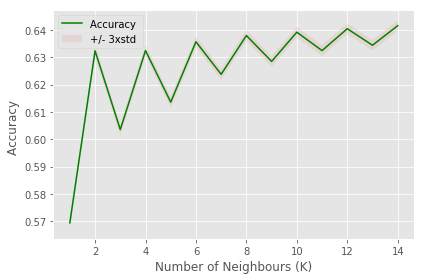

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#We can calculate the accuracy of KNN for different Ks
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [39]:
k = 10

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)

#Predicting
yhat_KNN = neigh.predict(X_testset)

#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhat_KNN))

Train set Accuracy:  0.6928368935194381
Test set Accuracy:  0.6391301431876866


## Decision Tree

In [40]:
#Modeling
from sklearn.tree import DecisionTreeClassifier

SevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SevTree.fit(X_trainset,y_trainset)

#Prediction
predTree = SevTree.predict(X_testset)

#Evaluation
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, SevTree.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Train set Accuracy:  0.6569671909138514
Test set Accuracy:  0.6554776835116193


## Model Evaluation using Test set

We will be using f1 score and Jaccard to evaluate our models

In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [42]:
# f1_score
print("KNN F1-score: ", f1_score(y_testset, yhat_KNN, average='weighted'))

# Jaccard
print("KNN Jaccard index: ", jaccard_similarity_score(y_testset, yhat_KNN))

KNN F1-score:  0.5852348738580737
KNN Jaccard index:  0.6391301431876866


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# f1_score
print("Decision Tree F1-score: ", f1_score(y_testset, predTree, average='weighted'))

# Jaccard
print("Decision Tree Jaccard index: ", jaccard_similarity_score(y_testset, predTree))

Decision Tree F1-score:  0.5296838384680211
Decision Tree Jaccard index:  0.6554776835116193


# Conclusion

To summarize, we realized that both our models were able to predict the outcome with considerable accuracy. The decision tree was able to outperform KNN by a slight margin and naturally will be the choice of model used moving forward. The model accuracy can be further improved by using other complex models available.

The Seattle department can now take it account these findings to be able to improve safety standards on the roads of Seattle.

# Thank you for your time!